# Salary vs Role

In [79]:
import pandas as pd
import ast
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## My Attempt

In [80]:
my_df = df[df['job_country'].isin(['United States','Canada'])].dropna(subset='salary_year_avg')
job_titles = my_df['job_title_short'].value_counts().index[:6].tolist()
job_titles.append('Business Analyst')
my_df_filtered = my_df[my_df['job_title_short'].isin(job_titles)]
my_df_filtered = my_df_filtered.dropna(subset=['salary_year_avg'])
job_list = [my_df_filtered[my_df_filtered['job_title_short']==job_title]['salary_year_avg']  for job_title in job_titles]

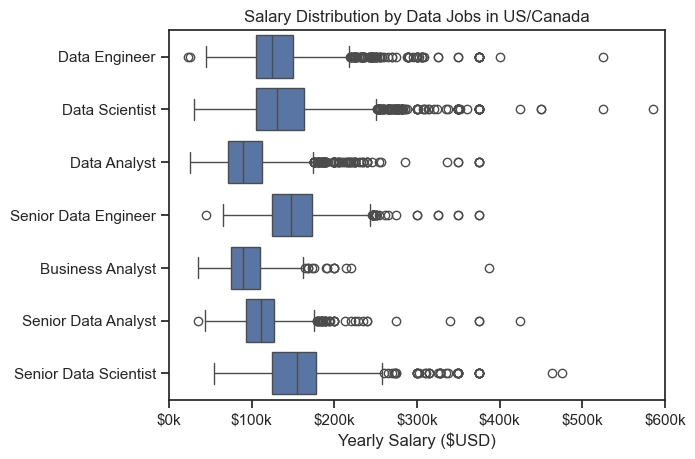

In [81]:
sns.boxplot(data=my_df_filtered,x='salary_year_avg',y='job_title_short')
plt.title('Salary Distribution by Data Jobs in US/Canada')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
ax = plt.gca()
plt.xlim(0,600000)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
plt.show()

## Tutorial (to help order the roles)

In [82]:
job_order = my_df_filtered.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

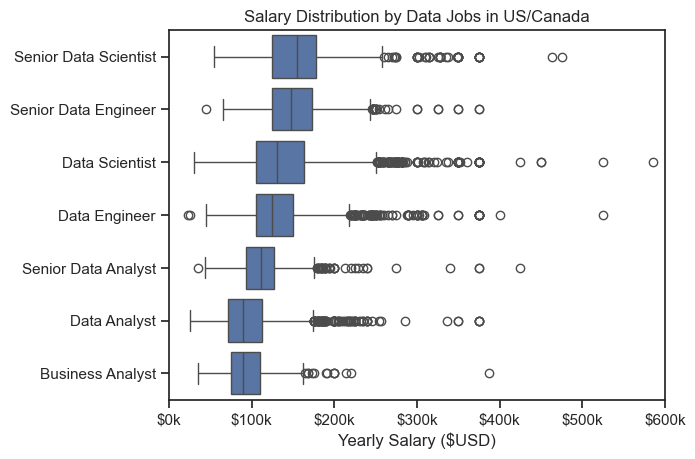

In [83]:
sns.boxplot(data=my_df_filtered,x='salary_year_avg',y='job_title_short',order=job_order)
plt.title('Salary Distribution by Data Jobs in US/Canada')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
ax = plt.gca()
plt.xlim(0,600000)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
plt.show()

# Salary vs Skill

## My Attempt

In [98]:
my_df_2 = df[(df['job_country'].isin(['United States','Canada'])) & (df['job_title_short']=='Data Analyst')].copy()
my_df_2 = my_df_2.dropna(subset='salary_year_avg')
my_df_2 = my_df_2.explode('job_skills')
my_df_2_grouped = my_df_2.groupby('job_skills')['salary_year_avg'].agg(['count','median'])
my_df_2_top_pay = my_df_2_grouped.sort_values(by='median',ascending=False).head(10)
my_df_2_skills = my_df_2_grouped.sort_values(by='count',ascending=False).head(10).sort_values(by='median',ascending=False)

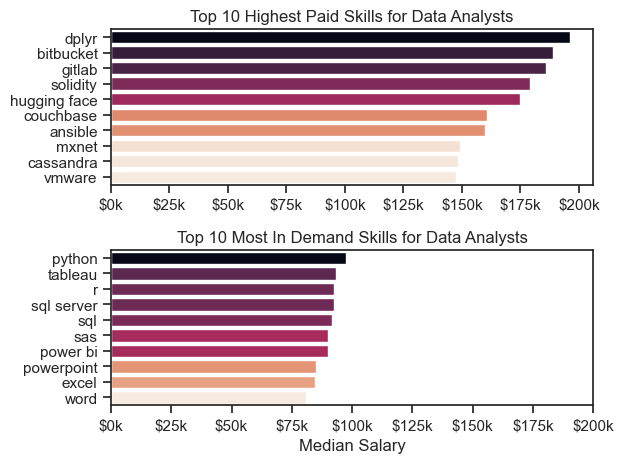

In [101]:
fig, ax = plt.subplots(2,1)
sns.set_theme(style='ticks')
sns.barplot(data=my_df_2_top_pay,x='median',y=my_df_2_top_pay.index,ax=ax[0],legend=False,hue='median',palette='rocket_r')
sns.barplot(data=my_df_2_skills,x='median',y=my_df_2_skills.index,ax=ax[1],legend=False,hue='median',palette='rocket_r')
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${int(x/1000)}k'))
ax[1].set_title('Top 10 Most In Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${int(x/1000)}k'))
plt.xlabel('Median Salary')
plt.xlim(0,200000)
fig.tight_layout()
plt.show()